# Regresión lineal en Python
## El paquete scikit-learn para regresión lineal y la selección de rasgos

In [168]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
data = pd.read_csv("Advertising.csv")

In [170]:
feature_cols = ["TV", "Radio", "Newspaper"] #columnas que van a ser variables predictivas

In [171]:
X = data[feature_cols] #las candidatas a ser variables predictoras
Y = data["Sales"] #la columna que quiero predecir

In [172]:
estimator = SVR(kernel="linear") #kernel: tipo de modelo que quiero crear
selector = RFE(estimator, n_features_to_select=2, step=1) #le paso el estimator al RFE y me quiero quedar con 2 variables predictivas
#SVR: support vector regression, soporta regresiones lineales y no lineales
#RFE: recursive feature elimination
selector.fit(X,Y)

RFE(estimator=SVR(kernel='linear'), n_features_to_select=2)

In [173]:
selector.support_ #se queda TV, Radio y se descartó Newspaper

array([ True,  True, False])

In [174]:
selector.ranking_ #devuelve un ranking de las variables mas importantes (las elegidas siempre serán 1)

array([1, 1, 2])

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
X_pred = X[["TV", "Radio"]]

In [177]:
lm = LinearRegression()
lm.fit(X_pred, Y)

LinearRegression()

In [178]:
lm.intercept_

2.921099912405138

In [179]:
lm.coef_

array([0.04575482, 0.18799423])

# Variables Categóricas
* La regresión lineal que hemos visto tiene la forma:

            y_model = a + b1*x1 + b2*x2 +...+ bn*xn + e
* Lo cual presupone que todas las variables del mismo toman valores numéricos

Pero, ¿Qué pasa con las variables categoricas?

Tomemos como ejemplo una variable x_k, la cual es una variable categorica, por ejemplo:
x_k =
* 1 si el cliente es hombre
* 0 si el cliente es mujer

Entonces el modelo se convierte en:
    
    Y_model = a + b_1.x_1 + b_2.x_2 +...+ b_k +...+b_n.x_n + e (Si el cliente es hombre)
    
    Y_model = a + b_1.x_1 + b_2.x_2 + ... + b_n.x_n + e (Si el cliente es mujer)
    
Donde solo el modelo en caso de ser hombre tiene el factor k-ésimo

En caso de ser tres niveles para una variable categórica (ciudad1, ciudad2, ciudad3), se necesitan definir dos nuevas variables igual a uno para dos de los posibles valores de la misma

x_k1:
* 1 Si el cliente es de la ciudad1
* 0 Si el cliente no es de la ciudad1

x_k2:
* 1 Si el cliente es de la ciudad2
* 0 Si el cliente no es de la ciudad2

No se pone un x_k3 porque ya se asume que si no es de la ciudad1 ni de la ciudad2, es de la ciudad3

Entonces el modelo se convierte en:

    Y_model = a + b_1.x_1 + b_2.x_2 +...+ b_k1 +...+b_n.x_n + e (Si el cliente es de la ciudad1)
    
    Y_model = a + b_1.x_1 + b_2.x_2 +...+ b_k2 +...+b_n.x_n + e (Si el cliente es de la ciudad2)
    
    Y_model = a + b_1.x_1 + b_2.x_2 + ... +b_n.x_n + e (Si el cliente es de la ciudad3)

Notemos que en todo caso, la última de las categorías no necesita de una variable.
    
    



# El tratamiento de las variables categóricas

In [180]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [181]:
df = pd.read_csv("python-ml-course\datasets\ecom-expense\Ecom Expense.csv")

In [182]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [183]:
dummy_gender = pd.get_dummies(df["Gender"], prefix= "Gender")
dummy_city = pd.get_dummies(df["City Tier"], prefix="City")
dummy_city

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
2357,0,1,0
2358,0,1,0
2359,0,0,1
2360,1,0,0


In [184]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [185]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()

In [186]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [187]:
df_new = df_new[column_names].join(dummy_city)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [188]:
feature_cols = ["Monthly Income", "Transaction Time",                   #Variables predictoras
                "Gender_Female", "Gender_Male",
                "City_Tier 1", "City_Tier 2", "City_Tier 3"] 

In [189]:
x = df_new[feature_cols]
y = df_new["Total Spend"] #Lo que quiero predecir

In [190]:
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [191]:
lm.intercept_

3655.729407690654

In [192]:
lm.coef_

array([   0.15297825,    0.12372609,  -94.15779883,   94.15779883,
        119.6632516 ,  -16.67901801, -102.9842336 ])

In [193]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.1529782460932051),
 ('Transaction Time', 0.1237260864262002),
 ('Gender_Female', -94.15779883032023),
 ('Gender_Male', 94.15779883032025),
 ('City_Tier 1', 119.66325160390122),
 ('City_Tier 2', -16.679018007990468),
 ('City_Tier 3', -102.98423359591075)]

In [194]:
lm.score(x,y) #R^2 (super bajo)

0.19478920552885381

In [195]:
feature_cols =  ["Monthly Income", "Transaction Time",                  
                "Gender_Female", "Gender_Male",
                "City_Tier 1", "City_Tier 2", "City_Tier 3",
                "Record"]  #Agrego Record

In [196]:
x = df_new[feature_cols]
y = df_new["Total Spend"] #Lo que quiero predecir
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [197]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205733),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Female', -131.0250132555464),
 ('Gender_Male', 131.02501325554658),
 ('City_Tier 1', 76.76432601049548),
 ('City_Tier 2', 55.138974309232275),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445638)]

In [198]:
lm.score(x,y) #R^2 (SUBIO UN MONTÓN)

0.9179923586131016

In [199]:
lm.intercept_

-79.41713030136816

El modelo puede ser escrito como:

    Total_Spend = -79.41713030136816 + 0.14753898049205733*'Monthly Income' +
        0.1549461254958966*'Transaction Time' + (-131.0250132555464)*'Gender_Female' +
        131.02501325554658*'Gender_Male' + 76.76432601049548*'City_Tier 1'+
        55.138974309232275*'City_Tier 2' + (-131.9033003197278)*'City_Tier 3'+
        772.2334457445638*'Record' 

* Si es hombre y vive en CT1:


    Total_Spend = -79.41713030136816 + 0.14753898049205733*'Monthly Income' +
        0.1549461254958966*'Transaction Time' +  131.02501325554658*'Gender_Male' +
        76.76432601049548*'City_Tier 1' + 772.2334457445638*'Record'
      
* Si es hombre y vive en CT2:


    Total_Spend = -79.41713030136816 + 0.14753898049205733*'Monthly Income' +
        0.1549461254958966*'Transaction Time' +  131.02501325554658*'Gender_Male' +
        55.138974309232275*'City_Tier 2'  + 772.2334457445638*'Record'

* Si es mujer y vive en CT3:


    Total_Spend = -79.41713030136816 + 0.14753898049205733*'Monthly Income' +
        0.1549461254958966*'Transaction Time' +  (-131.0250132555464)*'Gender_Female' +
        (-131.9033003197278)*'City_Tier 3'  + 772.2334457445638*'Record'

Y así para todos

In [200]:
df_new["Prediction"] = -79.41713030136816 + 0.14753898049205733*df_new['Monthly Income']+\
    0.1549461254958966*df_new['Transaction Time'] + (-131.0250132555464)*df_new['Gender_Female'] +\
    131.02501325554658*df_new['Gender_Male'] + 76.76432601049548*df_new['City_Tier 1']+\
    55.138974309232275*df_new['City_Tier 2'] + (-131.9033003197278)*df_new['City_Tier 3']+\
    772.2334457445638*df_new['Record']

In [201]:
df_new #comparamos total_spend con Prediction

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,TXN2358,50,7,5705,460.157207,3,Male,Tier 2,2909.619546,0,1,0,1,0,3336.456655
2358,TXN2359,35,11,11202,851.924751,8,Male,Tier 2,7968.633136,0,1,0,1,0,8069.348522
2359,TXN2360,27,5,21335,435.145358,8,Female,Tier 3,8816.406448,1,0,0,0,1,9050.690358
2360,TXN2361,45,12,19294,658.439838,7,Female,Tier 1,7915.595856,1,0,1,0,0,8220.596094


In [202]:
SSD = np.sum((df_new["Prediction"]-df_new["Total Spend"])**2)
SSD

1517733985.340816

In [203]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [204]:
sales_mean = np.mean(df_new['Total Spend'])
sales_mean

6163.176415976714

In [205]:
RSE/sales_mean #Error del 13%

0.13031135680294162

# Otra forma más simple de calcular las predicciones
 Otra posible forma de hacer el cálculo de las predicciones podría ser usando la función predict del modelo lineal y añadiendolo como columna adicional al data frame:

    df_new["prediction"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

## Eliminar variables Dummy redundantes

In [206]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:] #Me quedo con la primera columna en adelante
#osea, solo me quedo con Gender_male, descarto Gender_female porque es redundante, si no es hombre soy mujer.
#iloc[:,1:] todas las filas, desde la primera columna (empieza en 0) en adelante

In [207]:
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [208]:
dummy_city = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [209]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [210]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Male", "City_Tier 2", "City_Tier 3", "Record"]
x = df_new[feature_cols]
y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(x,y)

LinearRegression()

In [211]:
lm.intercept_

-133.67781754642238

In [212]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205735),
 ('Transaction Time', 0.15494612549589748),
 ('Gender_Male', 262.05002651109527),
 ('City_Tier 2', -21.625351701262765),
 ('City_Tier 3', -208.66762633022327),
 ('Record', 772.2334457445639)]

In [213]:
lm.score(x,y) #El modelo no ha cambiado

0.9179923586131016

Coeficientes con todas las variables en el modelo:

    [('Monthly Income', 0.14753898049205733),
    ('Transaction Time', 0.1549461254958966),
    ('Gender_Female', -131.0250132555464),
    ('Gender_Male', 131.02501325554658),
    ('City_Tier 1', 76.76432601049548),
    ('City_Tier 2', 55.138974309232275),
    ('City_Tier 3', -131.9033003197278),
    ('Record', 772.2334457445638)]

Coeficientes tras enmascarar las variables pertinentes:

    [('Monthly Income', 0.14753898049205735),
    ('Transaction Time', 0.15494612549589748),
    ('Gender_Male', 262.05002651109527),
    ('City_Tier 2', -21.625351701262765),
    ('City_Tier 3', -208.66762633022327),
    ('Record', 772.2334457445639)]
    
Los cambios se reflejan en
* Gender_Male: 
    * antes -> 131.02
    * despues -> 262.05 = (131.02 - (-131.02))
* Gender_Female: 
    * antes -> 131.02
    * despues -> 0 (la saqué)
* City Tier 1: 
    * antes-> 76.76
    * despues -> 0 (la saqué)
* City Tier 2: 
    * antes -> 55.13 
    * despues -> -26.62 = (55.13 - 76.76)
* City Tier 3: 
    * antes -> (-131.90)
    * despues -> -208.66 = ((-131.90) - 76.76)

***Siempre tengo que restar la variable que sobra, puede ser cualquiera, las variables categoricas de la misma categoria necesarias son siempre n-1, siendo n la cantidad de variables.***


# Transformación de variables para conseguir una relación no lineal

In [214]:
import pandas as pd

In [215]:
#data_auto = pd.read_csv("python-ml-course\datasets")
data_auto = pd.read_csv("python-ml-course//datasets//auto//auto-mpg.csv")

data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [216]:
data_auto.shape

(406, 9)

Text(0.5, 1.0, 'CV vs MPG')

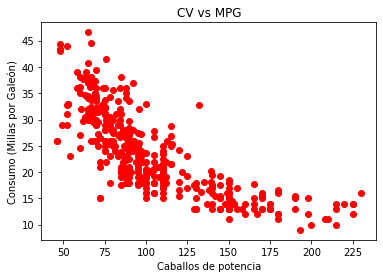

In [217]:
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de potencia")
plt.ylabel("Consumo (Millas por Galeón)")
plt.title("CV vs MPG")
#No se ve una relación lineal, parece mas una relación exponencial o parabolica

## Modelo de regresión Lineal
    Mpg = a + b*horsePower

In [235]:
x = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
x #esto no es un dataframe, es una columna, hay que reshapearlo

#el fit dá el error:
#Reshape your data either using array.reshape(-1, 1) 
#if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

x_data = x[:, np.newaxis]

#con [:, np.newaxis] se crea una nueva dimensión con todas las filas y lo convierte en un dataframe

In [236]:
#Reemplazamos los NA con los promedios 
lm = LinearRegression()
lm.fit(x_data,y)

LinearRegression()

In [237]:
type(x) #Esto es una serie

pandas.core.series.Series

In [238]:
type(x[:, np.newaxis]) #array bidimensional, lo que necesita la función 

numpy.ndarray

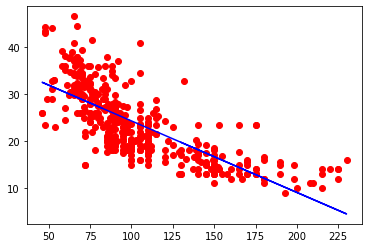

In [239]:
plt.plot(x,y, "ro")
plt.plot(x, lm.predict(x_data), color="blue")

In [240]:
lm.score(x_data, y) # R^2 = 57%

0.574653340645025

In [241]:
a = lm.intercept_
b = lm.coef_
a,b

(39.53387982903449, array([-0.15244505]))

In [225]:
#data_auto["prediccion"] = lm.intercept_ - 0.15244505*data_auto["horsepower"]
#SSD = np.sum((data_auto["prediccion"] - data_auto["mpg"])**2)
SSD = np.sum((y - lm.predict(x_data))**2)

SSD

10315.75196006092

In [226]:
RSE = np.sqrt(SSD/(len(x_data)-1-1))
RSE

5.053121758388698

In [227]:
mpg_mean = np.mean(data_auto["mpg"])
RSE/mpg_mean

0.2148931978286427

## Modelo de regresión Cuadratico
* mpg = a + b*horsepower^2

In [228]:
x_data = x**2

In [229]:
x_data = x_data[:,np.newaxis]

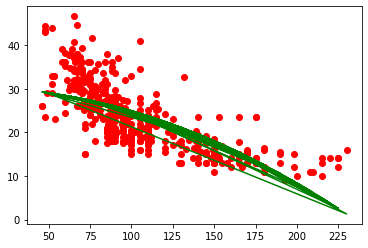

In [233]:
lm = LinearRegression()
lm.fit(x_data, y)
plt.plot(x,y, "ro")
plt.plot(x, lm.predict(x_data), color="green")

In [231]:
lm.score(x_data, y) #R^2 = 48%, ha bajado de 57%

0.4849887034823205

In [99]:
SSD = np.sum((y - lm.predict(x_data))**2)
RSE = np.sqrt(SSD/(len(x_data)-1-1))
error = RSE/mpg_mean
SSD, RSE, error*100 #Este modelo no ha funcionado, es mejor que el modelo lineal

(12490.350340501926, 5.5602795580454965, 23.646100612280495)

## Modelo de regresión lineal y cuadrático
    mpg = a + b * horsepower + c * horsepower^2 

In [100]:
#Para estos modelos polimoniales necesitaremos paquetes nuevos de scikit learn
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model #no es linear_regression, este es distinto al que usabamos antes

In [101]:
poly = PolynomialFeatures(degree=2) #grado del polinomio es 2

In [103]:
x_data = poly.fit_transform(x[:,np.newaxis])


In [104]:
lm = linear_model.LinearRegression()
lm.fit(x_data, y)

LinearRegression()

In [106]:
lm.score(x_data, y) # ha mejorado con respecto a los dos modelos, 64% de R^2

0.6439066584257469

In [107]:
lm.intercept_

55.02619244708117

In [108]:
lm.coef_


array([ 0.        , -0.43404318,  0.00112615])

    mpg = 55.02619244708117 - 0.4304318 * horsepower + 0.00112615 * (horsepower)^2

In [141]:
for d in range(2, 10):
    poly = PolynomialFeatures(degree=d)
    x_data = poly.fit_transform(x[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(x_data, y)
    validacion = regresion_validation(x_data, y, lm.predict(x_data))
    print("Regresión de grado "+str(d) + " => R^2:{0}, SSD:{1}, RSE:{2}, error: {3})".\
          format(lm.score(x_data, y),validacion[0], validacion[1], validacion[2]))
    
    #El mejor es el grado 6, pero por MUY poquito despues del grado 5, y a partir del grado 7 decrece

Regresión de grado 2 => R^2:0.6439066584257469, SSD:8636.1806435245, RSE:4.623492701540607, error: 19.662244039974794)
Regresión de grado 3 => R^2:0.6444678885560742, SSD:8622.569367428552, RSE:4.619847777117125, error: 19.64674333560516)
Regresión de grado 4 => R^2:0.6467674189704503, SSD:8566.79983249135, RSE:4.604883286297725, error: 19.58310411534058)
Regresión de grado 5 => R^2:0.6547512491818561, SSD:8373.171387690587, RSE:4.552545634225908, error: 19.36052872613915)
Regresión de grado 6 => R^2:0.6572841368245594, SSD:8311.742338960186, RSE:4.535815213486056, error: 19.289379567545517)
Regresión de grado 7 => R^2:0.6538574680116043, SSD:8394.847882982387, RSE:4.558434648322351, error: 19.38557283019506)
Regresión de grado 8 => R^2:0.6512432177602729, SSD:8458.25018451958, RSE:4.575616115122559, error: 19.458640144236202)
Regresión de grado 9 => R^2:0.6510536203451489, SSD:8462.848410140192, RSE:4.5768596853688805, error: 19.463928652998398)


In [132]:
def regresion_validation(x_data, y, y_pred):
    SSD = np.sum((y - y_pred)**2)
    RSE = np.sqrt(SSD/(len(x_data)-1-1))
    error = RSE/mpg_mean
    return (SSD, RSE, error*100)

In [142]:
#Nos quedamos con el grado 2

# El problema de los outliers
Los outliers son los puntos que forman parte del data set, que estan un poco alejados de la tendencia que sigue el resto de puntos, si hicieramos un scatter plot, veriamos claramente los outliers porque estan muy alejados del resto de datos.

esto puede ser bueno o puede ser malo,
* si es anormal encontrarse el punto alejado de la nube de puntos global, esto me va a arruinar el modelo

* si de vez en cuando sucede que se escapa algun punto, esto es importante tenerlo en cuenta

por eso se nos viene este problema:
¿Habria que sacar al outlier o dejarlo para hacer el modelado?

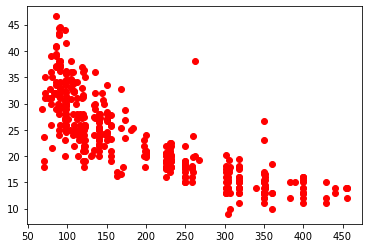

In [145]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro") #aca se distingue facil un outlier

In [146]:
x = data_auto["displacement"].fillna(data_auto["displacement"].mean())
y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
x_data = x[:,np.newaxis]

lm = LinearRegression()
lm.fit(x_data, y)

LinearRegression()

In [147]:
lm.score(x_data, y)

0.6261049762826918

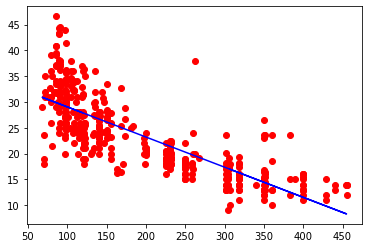

In [149]:
plt.plot(x_data, y, "ro")
plt.plot(x, lm.predict(x_data), color="blue")

In [158]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)] #Con esto imprimimos el outlier

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,prediccion
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel),26.576051


In [161]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)] #Con esto imprimimos el outlier

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,prediccion
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia,18.344018
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado,20.478249
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls,23.527150


In [163]:
data_auto_clean = data_auto.drop([395, 258, 305, 372]) #Filtro los outliers

In [164]:
x = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
x_data = x[:,np.newaxis]

lm = LinearRegression()
lm.fit(x_data, y)

LinearRegression()

In [166]:
lm.score(x_data, y) #subo de 62% a 64%

0.6466514317531822

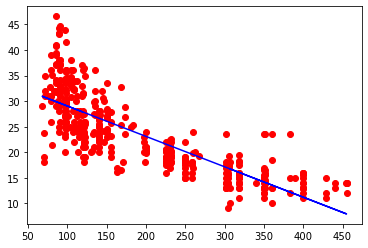

In [167]:
plt.plot(x_data, y, "ro")
plt.plot(x, lm.predict(x_data), color="blue")

# Analizar los residuos
* De forma ideal la nube de puntos de los residuos debe tener:
    * Distribución simétrica o bien concentrados en el centro del gráfico
    * Sin patrones claros en el gráfico
* Si se observan formas características puede ser porque:
    * La relación entre variables no es lineal
    * Hay outliers en el data set
    * Existen puntos con valores de predicción muy elevados

### Puntos con elevado Apalancamiento
Se puede calcular el apalancamiento de cada fila de datos del dataFrame

    Leverage_i = 1/n + ((x_i - x.mean)^2)/sum((x_i - x.mean)^2)
    
donde:
* n: es el conjunto de datos del dataset
* x_i: elemento i-ésimo 

Las filas con mayores niveles de apalancamiento, se eliminan del dataset antes de proceder a la creación del modelo

(esto nos da los outliers, la logica para detectarlos matematicamente es que estos puntos hacen un cambio MUY grande en los calculos)